# Chapter 14: exercise 9

##### Build your own CNN from scratch and try to achieve the highestpossible accuracy on MNIST

In [1]:
import numpy as np
import pandas as pd
import os
import sklearn
import tensorflow as tf
from tensorflow import keras

In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [4]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 [==============================] - 178s 103ms/step - loss: 1.0133 - accuracy: 0.6342 - val_loss: 0.4031 - val_accuracy: 0.8578
Epoch 2/10
1719/1719 [==============================] - 180s 104ms/step - loss: 0.4571 - accuracy: 0.8442 - val_loss: 0.3393 - val_accuracy: 0.8772
Epoch 3/10
1719/1719 [==============================] - 181s 105ms/step - loss: 0.3738 - accuracy: 0.8710 - val_loss: 0.3149 - val_accuracy: 0.8894
Epoch 4/10
1719/1719 [==============================] - 181s 105ms/step - loss: 0.3236 - accuracy: 0.8889 - val_loss: 0.2934 - val_accuracy: 0.8866
Epoch 5/10
1719/1719 [==============================] - 182s 106ms/step - loss: 0.3116 - accuracy: 0.8914 - val_loss: 0.3186 - val_accuracy: 0.8920
Epoch 6/10
1719/1719 [==============================] - 182s 106ms/step - loss: 0.2982 - accuracy: 0.8990 - val_loss: 0.2770 - val_accuracy: 0.9024
Epoch 7/10
1719/1719 [==============================] - 182s 106ms/step - loss: 0.2865 - accuracy: 0.9008 - val_

In [ ]:
score = model.evaluate(X_test, y_test)

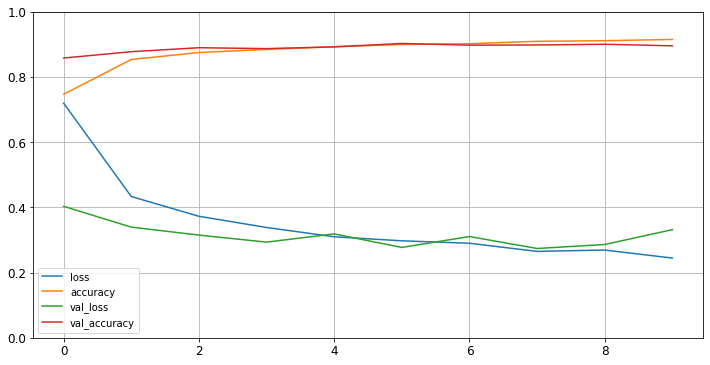

In [9]:
pd.DataFrame(history.history).plot(figsize = (12,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()